In [1]:
# import wine dataset from sklearn
from sklearn.datasets import load_wine
wine = load_wine()

features, labels = wine.data, wine.target

print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [2]:
# make a df of the data and labels
import pandas as pd
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [3]:
# Pandas profiling
import pandas_profiling
# pandas_profiling.ProfileReport(df)

In [4]:
# Make stratified train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)

# make a copy of the original data
X_train_orig = X_train.copy()
X_test_orig = X_test.copy()


# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Normalize the data
from sklearn.preprocessing import Normalizer
# normalizer = Normalizer()
# X_train = normalizer.fit_transform(X_train)
# X_test = normalizer.transform(X_test)


In [5]:
# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)
print('KMeans')
print('Adjusted Rand score: ', adjusted_rand_score(y_test, y_pred))
print('Adjusted Mutual Info score: ', adjusted_mutual_info_score(y_test, y_pred))
print()
# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_train)
y_pred = agg.fit_predict(X_test)
print('Agglomerative Clustering')
print('Adjusted Rand score: ', adjusted_rand_score(y_test, y_pred))
print('Adjusted Mutual Info score: ', adjusted_mutual_info_score(y_test, y_pred))
print()
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
dbscan.fit(X_train)
y_pred = dbscan.fit_predict(X_test)
print(y_pred)
print('Adjusted Rand score: ', adjusted_rand_score(y_test, y_pred))
print('Adjusted Mutual Info score: ', adjusted_mutual_info_score(y_test, y_pred))
print()
# Gaussian Mixture
gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X_train)
y_pred = gm.predict(X_test)
print('Gaussian Mixture')
print('Adjusted Rand score: ', adjusted_rand_score(y_test, y_pred))
print('Adjusted Mutual Info score: ', adjusted_mutual_info_score(y_test, y_pred))

KMeans
Adjusted Rand score:  0.9087939960390535
Adjusted Mutual Info score:  0.9038208073745453

Agglomerative Clustering
Adjusted Rand score:  0.8235455511986556
Adjusted Mutual Info score:  0.8074744005290694

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Adjusted Rand score:  0.0
Adjusted Mutual Info score:  0.0

Gaussian Mixture
Adjusted Rand score:  0.9158702695170524
Adjusted Mutual Info score:  0.9064073000754541


# TRY TO TURN OFF STANDARDIZATION AND SEE HOW IT CHANGES THE RESULTS

/Users/hrmussa/projects/AASAMC/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/hrmussa/projects/AASAMC/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/hrmussa/projects/AASAMC/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/hrmussa/projects/AASAMC/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


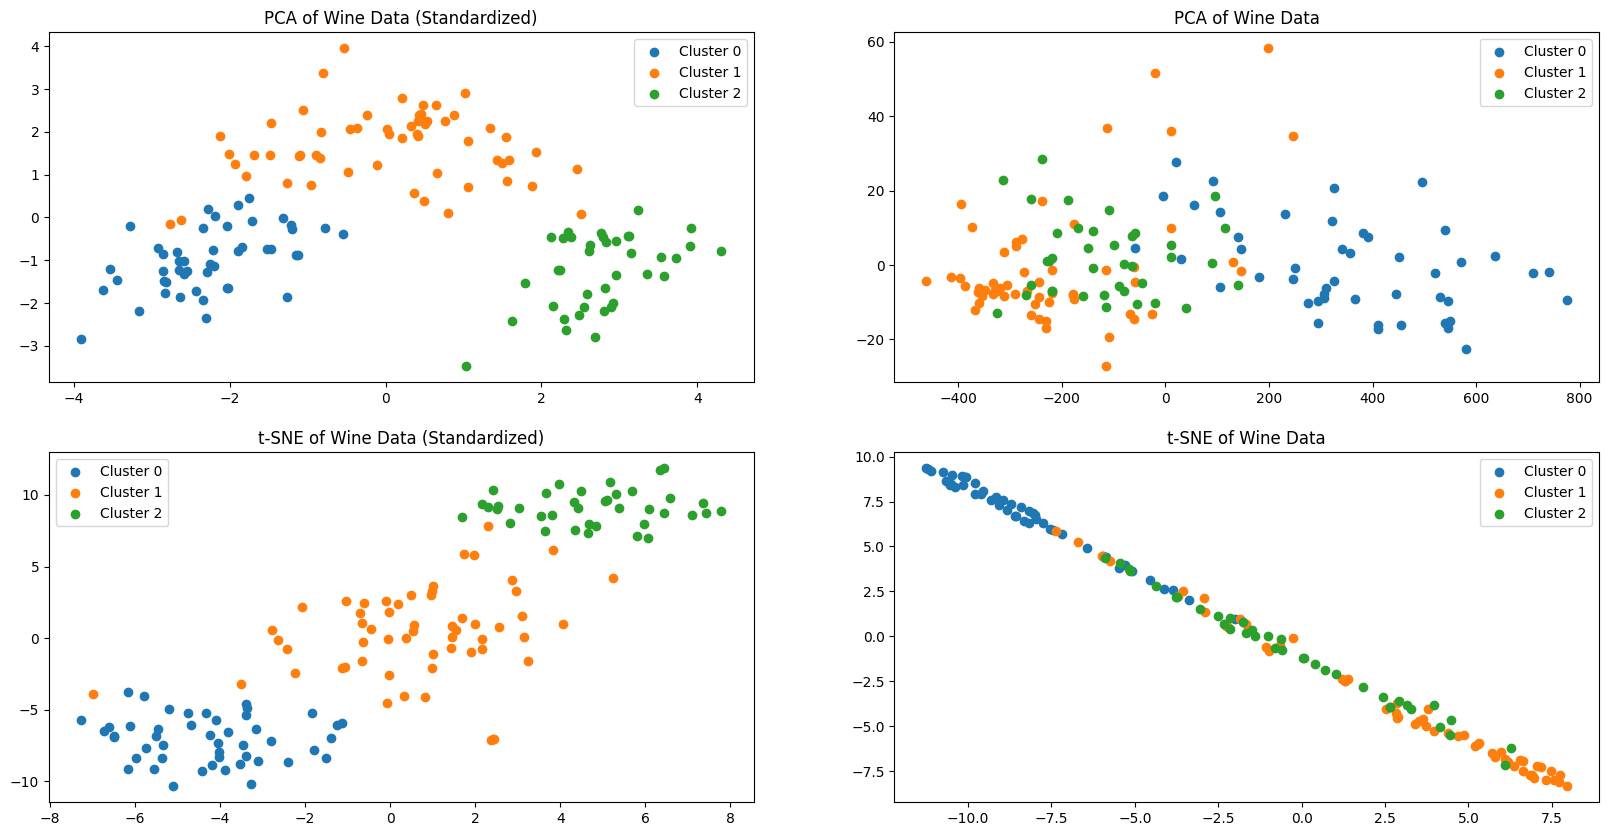

In [6]:
# Plot the data after PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# PCA the original data
X_train_orig_pca = pca.fit_transform(X_train_orig)
X_test_orig_pca = pca.transform(X_test_orig)

# Do the same for t-sne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)
# X_test_tsne = tsne.transform(X_test)

# TSNE the original data
X_train_orig_tsne = tsne.fit_transform(X_train_orig)
# X_test_orig_tsne = tsne.transform(X_test_orig)


# Plot the data
import matplotlib.pyplot as plt
%matplotlib inline

fix, ax = plt.subplots(2, 2, figsize=(20, 10))

# Plot the data for each cluster
for i in range(3):
    ax[0,0].scatter(X_train_pca[y_train==i, 0], X_train_pca[y_train==i, 1], label='Cluster {}'.format(i))
    ax[0,1].scatter(X_train_orig_pca[y_train==i, 0], X_train_orig_pca[y_train==i, 1], label='Cluster {}'.format(i))
ax[0,0].set_title('PCA of Wine Data (Standardized)')
ax[0,1].set_title('PCA of Wine Data')
ax[0,0].legend()
ax[0,1].legend()

# Plot the data for each cluster
for i in range(3):
    ax[1,0].scatter(X_train_tsne[y_train==i, 0], X_train_tsne[y_train==i, 1], label='Cluster {}'.format(i))
    ax[1,1].scatter(X_train_orig_tsne[y_train==i, 0], X_train_orig_tsne[y_train==i, 1], label='Cluster {}'.format(i))
ax[1,0].set_title('t-SNE of Wine Data (Standardized)')
ax[1,1].set_title('t-SNE of Wine Data')
ax[1,0].legend()
ax[1,1].legend()

plt.show()


In [7]:
# Clustering on the reduced data
# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_pca)
y_pred = kmeans.predict(X_test_pca)
print('KMeans')
print('Adjusted Rand score: ', adjusted_rand_score(y_test, y_pred))
print('Adjusted Mutual Info score: ', adjusted_mutual_info_score(y_test, y_pred))
print()
# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_train_pca)
y_pred = agg.fit_predict(X_test_pca)
print('Agglomerative Clustering')
print('Adjusted Rand score: ', adjusted_rand_score(y_test, y_pred))
print('Adjusted Mutual Info score: ', adjusted_mutual_info_score(y_test, y_pred))
print()
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
dbscan.fit(X_train_pca)
y_pred = dbscan.fit_predict(X_test_pca)
print(y_pred)
print('Adjusted Rand score: ', adjusted_rand_score(y_test, y_pred))
print('Adjusted Mutual Info score: ', adjusted_mutual_info_score(y_test, y_pred))
print()
# Gaussian Mixture
gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X_train_pca)
y_pred = gm.predict(X_test_pca)
print('Gaussian Mixture')
print('Adjusted Rand score: ', adjusted_rand_score(y_test, y_pred))
print('Adjusted Mutual Info score: ', adjusted_mutual_info_score(y_test, y_pred))

KMeans
Adjusted Rand score:  0.825113352456741
Adjusted Mutual Info score:  0.8448854572673881

Agglomerative Clustering
Adjusted Rand score:  0.6315277439977763
Adjusted Mutual Info score:  0.6823765264003419

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Adjusted Rand score:  0.0
Adjusted Mutual Info score:  0.0

Gaussian Mixture
Adjusted Rand score:  0.8294256581600322
Adjusted Mutual Info score:  0.8103969728571504


In [8]:
# Put all the standardized data into a dataframe and run pandas profiling
import pandas as pd
df = pd.DataFrame(X_train, columns=wine.feature_names)
df['target'] = y_train
df.head()

# Run pandas profiling
import pandas_profiling
profile = pandas_profiling.ProfileReport(df)
profile.to_file(output_file="wine.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/hrmussa/projects/AASAMC/.venv/lib/python3.9/site-packages/multimethod/__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
# Calculate the performance of each clustering methods for each number of components using pca
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
methods = [KMeans, AgglomerativeClustering, GaussianMixture]
method_names = ['KMeans', 'Agglomerative Clustering', 'Gaussian Mixture']
n_components = range(1, 13)
scores = []
for method, method_name in zip(methods, method_names):
    for n in n_components:
        pca = PCA(n_components=n)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        if method_name == 'Agglomerative Clustering':
            cluster = method(n_clusters=3)
            y_pred = cluster.fit_predict(X_test_pca)
        elif method_name == 'Gaussian Mixture':
            cluster = method(n_components=3, random_state=42)
            cluster.fit(X_train_pca)
            y_pred = cluster.predict(X_test_pca)
        else:
            cluster = method(n_clusters=3, random_state=42)
            cluster.fit(X_train_pca)
            y_pred = cluster.predict(X_test_pca)
        score = adjusted_rand_score(y_test, y_pred)
        scores.append([method_name, n, score])

In [17]:
scores

[['KMeans', 1, 0.4547442263016444],
 ['KMeans', 2, 0.825113352456741],
 ['KMeans', 3, 0.825113352456741],
 ['KMeans', 4, 0.825113352456741],
 ['KMeans', 5, 0.825113352456741],
 ['KMeans', 6, 0.9087939960390535],
 ['KMeans', 7, 0.9087939960390535],
 ['KMeans', 8, 0.9087939960390535],
 ['KMeans', 9, 0.9087939960390535],
 ['KMeans', 10, 0.9087939960390535],
 ['KMeans', 11, 0.9087939960390535],
 ['KMeans', 12, 0.9087939960390535],
 ['Agglomerative Clustering', 1, 0.515411824153613],
 ['Agglomerative Clustering', 2, 0.6315277439977763],
 ['Agglomerative Clustering', 3, 0.4834418986015579],
 ['Agglomerative Clustering', 4, 0.8235455511986556],
 ['Agglomerative Clustering', 5, 0.6699767685509953],
 ['Agglomerative Clustering', 6, 0.5185644844347916],
 ['Agglomerative Clustering', 7, 0.5185644844347916],
 ['Agglomerative Clustering', 8, 0.45924304395414484],
 ['Agglomerative Clustering', 9, 0.842162802350476],
 ['Agglomerative Clustering', 10, 0.9167442341503775],
 ['Agglomerative Clustering',

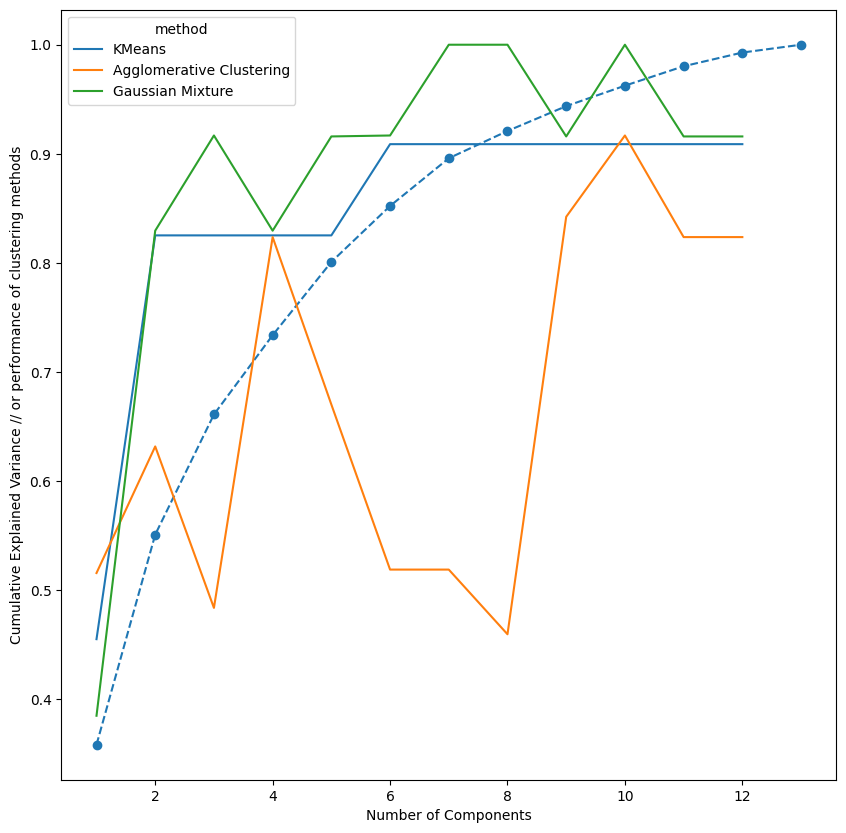

In [19]:
# PCA: Plot the explained variance ratio
pca = PCA()
pca.fit(X_train)
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(range(1, 14), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance // or performance of clustering methods')

# plot the performance of each clustering methods for each number of components using pca
scores = pd.DataFrame(scores, columns=['method', 'n_components', 'score'])
import seaborn as sns
sns.lineplot(x='n_components', y='score', hue='method', data=scores)


plt.show()